## EDA of TAXI dataset

In [205]:
import pandas as pd
import numpy as np

path = "../../data/taxi_trip_pricing.csv"

df = pd.read_csv(path)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


**Each column has 50 nan values**

In [207]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [208]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [209]:
describe_filtered = df[df["Trip_Price"].isna()].describe().T
describe_full = df.describe().T

In [210]:
describe_diff = describe_full - describe_filtered
describe_diff

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,901.0,2.214833,5.360995,-0.30,-0.2875,0.26,3.3650,96.557047
Passenger_Count,903.0,0.051310,-0.034961,0.00,0.2500,-1.00,0.0000,0.000000
Base_Fare,907.0,-0.124220,-0.071795,-0.04,-0.1050,-0.16,-0.2100,0.030000
Per_Km_Rate,907.0,-0.071335,0.004317,-0.01,-0.0550,-0.11,-0.0450,0.060000
Per_Minute_Rate,902.0,0.018541,-0.003177,-0.01,0.0325,0.02,0.0375,0.000000
Trip_Duration_Minutes,905.0,-1.487662,3.282674,-4.98,-4.6875,-1.01,7.6850,2.270000
Trip_Price,951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
df.sort_values(by="Trip_Distance_km", ascending=False)[(df["Day_of_Week"] == "Weekend") & (df["Time_of_Day"] == "Afternoon") ][33:34]

C:\Users\Ludvi\AppData\Local\Temp\ipykernel_15260\4221427023.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(by="Trip_Distance_km", ascending=False)[(df["Day_of_Week"] == "Weekend") & (df["Time_of_Day"] == "Afternoon") ][33:34]


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
91,35.95,Afternoon,Weekend,4.0,Low,Clear,3.58,0.95,0.44,6.1,40.4165


**We should use machinelearning to predict and set these 50 nan values on each column to something better**

In [212]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [213]:
"""convert_price = lambda x: x if True in x.drop("Trip_Price").isna().to_list() else float(x["Trip_Distance_km"]) * float(x["Per_Km_Rate"]) + float(x["Trip_Duration_Minutes"]) * float(x["Per_Minute_Rate"]) + float(x["Base_Fare"])

df["Trip_Price"] = df.apply(axis=1, func=convert_price)

df["Trip_Price"]
"""

'convert_price = lambda x: x if True in x.drop("Trip_Price").isna().to_list() else float(x["Trip_Distance_km"]) * float(x["Per_Km_Rate"]) + float(x["Trip_Duration_Minutes"]) * float(x["Per_Minute_Rate"]) + float(x["Base_Fare"])\n\ndf["Trip_Price"] = df.apply(axis=1, func=convert_price)\n\ndf["Trip_Price"]\n'

In [214]:


def update_trip_price(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Trip_Price"].isna()) & (df[["Trip_Distance_km","Base_Fare", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Trip_Price"] = (
        filter_df["Trip_Distance_km"] * filter_df["Per_Km_Rate"] +
        filter_df["Trip_Duration_Minutes"] * filter_df["Per_Minute_Rate"] +
        filter_df["Base_Fare"]
    )
    return df


def update_trip_distance(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Trip_Distance_km"].isna()) & 
                   (df[["Trip_Price", "Base_Fare", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Trip_Distance_km"] = (
        filter_df["Trip_Price"] - 
        filter_df["Base_Fare"] - 
        (filter_df["Per_Minute_Rate"] * filter_df["Trip_Duration_Minutes"])
    ) / filter_df["Per_Km_Rate"]
    return df


def update_base_fare(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Base_Fare"].isna()) &
                   (df[["Trip_Price", "Trip_Distance_km", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Base_Fare"] = (
        filter_df["Trip_Price"] -
        (filter_df["Per_Km_Rate"] * filter_df["Trip_Distance_km"]) -
        (filter_df["Per_Minute_Rate"] * filter_df["Trip_Duration_Minutes"])
    )
    return df


def update_per_km_rate(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Per_Km_Rate"].isna()) &
                   (df[["Trip_Price", "Base_Fare", "Trip_Distance_km", "Per_Minute_Rate", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Per_Km_Rate"] = (
        filter_df["Trip_Price"] -
        filter_df["Base_Fare"] -
        (filter_df["Per_Minute_Rate"] * filter_df["Trip_Duration_Minutes"])
    ) / filter_df["Trip_Distance_km"]
    return df


def update_per_minute_rate(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Per_Minute_Rate"].isna()) &
                   (df[["Trip_Price", "Base_Fare", "Per_Km_Rate", "Trip_Distance_km", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Per_Minute_Rate"] = (
        filter_df["Trip_Price"] -
        filter_df["Base_Fare"] -
        (filter_df["Per_Km_Rate"] * filter_df["Trip_Distance_km"])
    ) / filter_df["Trip_Duration_Minutes"]
    return df


def update_trip_duration_minutes(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Trip_Duration_Minutes"].isna()) &
                   (df[["Trip_Price", "Base_Fare", "Per_Km_Rate", "Trip_Distance_km", "Per_Minute_Rate"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Trip_Duration_Minutes"] = (
        filter_df["Trip_Price"] -
        filter_df["Base_Fare"] -
        (filter_df["Per_Km_Rate"] * filter_df["Trip_Distance_km"])
    ) / filter_df["Per_Minute_Rate"]
    return df

def clean_df(df: pd.DataFrame) -> pd.DataFrame:
    df = update_trip_price(df)
    df = update_trip_distance(df)
    df = update_base_fare(df)
    df = update_per_km_rate(df)
    df = update_per_minute_rate(df)
    df = update_trip_duration_minutes(df)
    return df


In [215]:
df = clean_df(df)

In [226]:
df.isna().sum().sum()

np.int64(316)

In [221]:
df.sort_values(by="Base_Fare", ascending=False)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
288,15.04,Morning,Weekday,1.0,Low,Clear,5.00,1.78,0.11,15.09,33.4311
623,24.74,Night,Weekend,3.0,High,Clear,5.00,1.82,0.36,107.93,88.8816
383,44.00,Morning,Weekday,3.0,Low,Clear,4.99,1.20,0.46,41.76,76.9996
951,33.59,Morning,Weekday,4.0,Medium,Clear,4.99,1.16,0.15,77.02,55.5074
330,18.44,Afternoon,Weekday,2.0,Low,Rain,4.99,1.90,0.18,44.45,48.0270
...,...,...,...,...,...,...,...,...,...,...,...
424,NaN,Night,Weekday,1.0,High,Clear,NaN,1.42,0.48,23.11,19.2572
547,33.91,Afternoon,Weekday,4.0,Medium,Clear,NaN,0.53,0.11,NaN,29.2693
728,10.88,Evening,Weekday,2.0,Medium,Clear,NaN,1.92,0.34,NaN,41.9406
871,14.27,Morning,Weekend,1.0,Low,Clear,NaN,1.45,0.27,27.05,NaN


<Axes: >

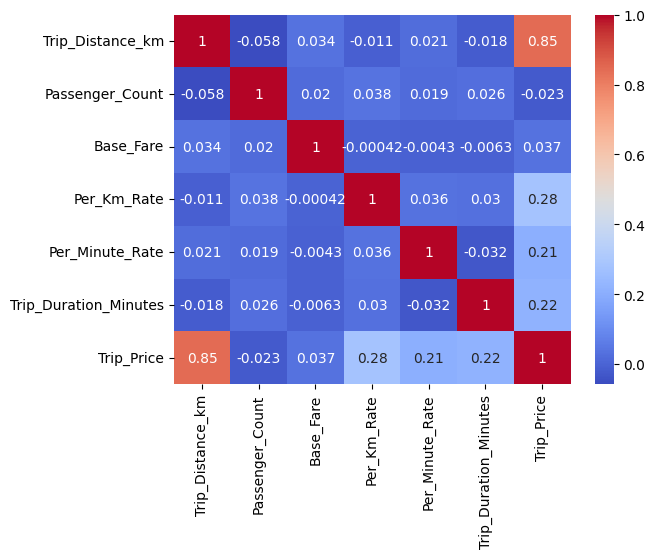

In [225]:
import seaborn as sns

#drop non-numeric columns for correlation heatmap like time of day day of week traffic coindition wehater columns is not in it
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")


In [233]:
df.notna().all(axis=1).sum()

np.int64(745)

In [242]:
df.isna().sum()

Trip_Distance_km          6
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                12
Per_Km_Rate              11
Per_Minute_Rate           5
Trip_Duration_Minutes    15
Trip_Price               17
dtype: int64

In [246]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,8.64,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.50,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.32,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


## SAVE THE FIRST 100% REPAIR PART TO CSV

In [ ]:
df.to_csv("taxi_trip_pricing_numeric_repaired.csv", index=False)